## > ***Atividade_02 | Diagnóstica de Machine Learning***

### - Algoritmos básicos de programação em linguagem python e análise de dados.

- Somativa

#### **1:** Escreva uma função que receba uma lista de números e retorne outra lista com os números ímpares.

In [1]:
#### Utilizadno list comprehension para pegar apenas os número ímpares:

def filtrar_impares(lista):
    return [num for num  in lista if num % 2 !=0]


In [2]:
### Exemplo:

numeros = [10,11,12,12,14,15,16,17,18,19]
resultado = filtrar_impares(numeros)
print(f"""Os números impares sao: {resultado}""")

Os números impares sao: [11, 15, 17, 19]


#### **2.** Escreva uma função que receba uma lista de números e retorne outra lista com os números primos presentes.

In [3]:
### Verificar se cada número da lista é primo e retornar apenas os que forem:

def primos(n):
    if n < 2:
        return False
    for i in range(2, int(n **0.5) +1): #### Otimização da chegagem, pois só se precisa testar divisores até a raiz quadrada
        if n%i == 0:
            return False
    return True

def filtrar_primos(lista):
    return [num for num in lista if primos(num)]

In [4]:
#### Aplicação:

numeros = [1,2,3,4,5,6,7,8,9,10,11,12,12,14,15,16,17,18,10,20]
resultado = filtrar_primos(numeros)
print(f""" OS números primos na lista informada são: {resultado}""")

 OS números primos na lista informada são: [2, 3, 5, 7, 11, 17]


#### **3**. Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

In [5]:
#### Manipulação de Listas. A ideia é pegar duas listas e retornar os elementos que estão apenas uma delas (a diferença simétrica)?

def elementos_unicos(lista_01, lista_02):
    return list(set(lista_01) ^ set(lista_02)) ### Calculandoa  diferença simétrica

In [6]:
lista_a = [90,42,576,3566,78788]
lista_b = [576,42, 3567, 78789]

resultado = elementos_unicos(lista_a, lista_b)
print(f""" Diferença Simétrica:{resultado}""")

 Diferença Simétrica:[78788, 78789, 3566, 3567, 90]


#### **4**. Escreva uma função que receba duas listas e retorne outra lista com os elementos que estão presentes em apenas uma das listas.

In [7]:
### Encontrando o segundo maior elemento de uma lista:

def segundo_maior(lista):

    # Usando uma lista única:
    lista_unica = list(set(lista))

    # Ordenando em ordem decrescente:
    lista_unica.sort(reverse=True)

    #Retornando o segundo elemento

    if len(lista_unica) >= 2:
        return lista_unica[1]
    else:
        return None # Caso não exista um segundo elemento maior



In [8]:
numeros = [30,2954,44882,558348723,5858]
resultado = segundo_maior(numeros)
print(f""" Segundo maior elemento {resultado}""")

 Segundo maior elemento 44882


#### **5** > Crie uma função que receba uma lista de tuplas, cada uma contendo o nome e a idade de uma pessoa, e retorne a lista ordenada pelo nome das pessoas em ordem alfabética.

In [9]:
def lista_tuplas(lista):
    return sorted(lista, key=lambda x: x [0])

In [10]:
dados = [("Ana", 38), ("Geovane", 78), ("Andre", 19), ("Maria", 16), ("Leonardo", 26), ("Maria Eduarda", 29)]
resultado = lista_tuplas(dados)
print(f""" A lista ordenada  é: {resultado}""")

 A lista ordenada  é: [('Ana', 38), ('Andre', 19), ('Geovane', 78), ('Leonardo', 26), ('Maria', 16), ('Maria Eduarda', 29)]


#### > **6.** Como identificar e tratar outliers em uma coluna numérica usando desvio padrão ou quartis?

#### Para simular algumas formas de tratamento de dados em colunas de atributos, irei importar um dataset proveniente do Kaggle a respeito da qualidade da água disponível no link= "https://www.kaggle.com/datasets/lakhanlalgupta/dataforwqi"

- Esse dataset contém variáveis como *"temperatura, oxigênio dissolvido, pH, oxigênio bioquímico, etc. Basta criar um relatório de classificação e, posteriormente, podemos tomar uma decisão, como se a água é potável ou não.
Você pode criar seu próprio notebook e enviá-lo aqui para que os usuários possam utilizá-lo"*.

In [11]:
import pandas as pd
import numpy as np

#### Portanto, irei efetuar a leitura do dataset:

In [12]:
df_water_quality = pd.read_csv(r"D:\HD 1TB\Documentos\Cursos Online\Bootcamp_Avanti_ML\projeto_atividade_01_bootcamp_machine_Learning_avantii_atlantico\atividade_01\atividade_02\data\Results_MADE.csv", sep=",", encoding='latin-1')

In [13]:
df_water_quality.head(7)

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
0,7.5,9.95,7.85,0.15,90.0,0.255,22.5,180.0,134.5,27.143963
1,11.0,9.65,7.70,0.45,205.0,0.200,62.5,410.0,77.0,15.780001
2,7.5,9.90,7.65,0.55,100.0,0.100,26.0,200.0,101.5,20.612438
3,8.5,9.65,7.55,0.35,300.0,0.250,97.5,600.0,148.0,29.820475
4,10.0,9.55,7.80,0.25,190.0,0.150,47.5,380.0,106.0,21.498569
5,11.0,9.45,7.75,0.85,222.5,0.300,67.0,445.0,97.5,19.857190
6,9.5,9.55,7.90,0.50,285.0,0.195,74.5,570.0,203.5,40.804965


#### Obtendo a quantidade linhas e colunas do dataset

In [14]:
df_water_quality.shape

(295, 10)

#### Dataset de qualidade da água possui um total de 295 objetos e 10 colunas, visualizando algumas estatísticas básicas para realizar a identificação de possíveis outliers

In [15]:
df_water_quality.describe()

,Temperature,Dissolved Oxygen,pH,Bio-Chemical Oxygen Demand (mg/L),Faecal Streptococci (MPN/ 100 mL),Nitrate (mg/ L),Faecal Coliform (MPN/ 100 mL),Total Coliform (MPN/ 100 mL),Conductivity (mho/ Cm),WQI
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,20.903898,7.342034,7.754627,3.544136,7463.333729,0.870915,5983.661695,14926.667458,501.860678,100.889437
std,6.051566,1.910113,0.378879,9.043299,26272.135186,1.431247,22934.986514,52544.270371,798.311280,158.115301
min,0.000000,0.000000,5.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524595
25%,18.000000,6.850000,7.550000,0.725000,29.225000,0.155000,4.000000,58.450000,208.250000,42.010910
50%,22.500000,7.750000,7.750000,1.600000,240.000000,0.550000,79.500000,480.000000,299.500000,60.379172
75%,25.550000,8.600000,8.000000,3.100000,2650.000000,0.950000,2375.000000,5300.000000,438.250000,90.120883
max,30.500000,10.250000,8.600000,123.500000,229000.000000,14.050000,251000.000000,458000.000000,9272.000000,1834.549110


In [16]:
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        295 non-null    float64
 1   Dissolved Oxygen                   295 non-null    float64
 2   pH                                 295 non-null    float64
 3   Bio-Chemical Oxygen Demand (mg/L)  295 non-null    float64
 4   Faecal Streptococci (MPN/ 100 mL)  295 non-null    float64
 5   Nitrate (mg/ L)                    295 non-null    float64
 6   Faecal Coliform (MPN/ 100 mL)      295 non-null    float64
 7   Total Coliform (MPN/ 100 mL)       295 non-null    float64
 8   Conductivity (mho/ Cm)             295 non-null    float64
 9   WQI                                295 non-null    float64
dtypes: float64(10)
memory usage: 23.2 KB


#### Renomando algumas colunas do dataframe para que as manipulações pelo nome das colunas fiquem mais fáceis:

In [17]:
map_rename = {
    "Bio-Chemical Oxygen Demand (mg/L)":"Bio_Chemical_Oxygen_Demand_mg_L",
    "Faecal Streptococci (MPN/ 100 mL)" : "Feacal_Steptococci_MPN_100_per_ml",
    "Nitrate (mg/ L)": "Nitrate_mg_per_L",
    "Faecal Coliform (MPN/ 100 mL)" :"Faecal_Coliform_MPN_per_100_ml",
    "Total Coliform (MPN/ 100 mL)": "Total_Coliform_MPN_per_100_ml",
    "Conductivity (mho/ Cm)": "Conductivity_mho_per_Cm"
}

In [18]:
df_water_quality = df_water_quality.rename(columns=map_rename)

In [19]:
df_water_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Temperature                        295 non-null    float64
 1   Dissolved Oxygen                   295 non-null    float64
 2   pH                                 295 non-null    float64
 3   Bio_Chemical_Oxygen_Demand_mg_L    295 non-null    float64
 4   Feacal_Steptococci_MPN_100_per_ml  295 non-null    float64
 5   Nitrate_mg_per_L                   295 non-null    float64
 6   Faecal_Coliform_MPN_per_100_ml     295 non-null    float64
 7   Total_Coliform_MPN_per_100_ml      295 non-null    float64
 8   Conductivity_mho_per_Cm            295 non-null    float64
 9   WQI                                295 non-null    float64
dtypes: float64(10)
memory usage: 23.2 KB


#### Identificando outliers para as algumas variáveis, já que todas elas são variáveis quantitativas (numéricas)

*   Transformando a colunas de atributos da variável **temperature** em um array de nuympy para facilitar os cálculos das estatísticas descritivas:

In [20]:
array_coliformes = np.array([df_water_quality.Total_Coliform_MPN_per_100_ml])

> Utilizando os quartis para a identificar os possíveis outliers

In [21]:
Q1 = np.quantile(array_coliformes, q=0.25, method='linear')
print("O primeiro Quartil é: ", Q1)

Q2 = np.quantile(array_coliformes, q=0.5, method='linear')
print(" A média ou 2º Quartil é: ", Q2)

Q3 = np.quantile(array_coliformes, q=0.75, method='linear')
print("O Terceiro Quartil é: ", Q3)

iqr_coliform = Q3 - Q1

print("O IQR da variável total_Coliform_MPN_per_100_ml é: ", iqr_coliform)

O primeiro Quartil é:  58.45
 A média ou 2º Quartil é:  480.0
O Terceiro Quartil é:  5300.0
O IQR da variável total_Coliform_MPN_per_100_ml é:  5241.55


#### Visualizando com Boxplot utilizando a biblioteca plotly.express

In [22]:
import plotly.express as px

In [23]:
box_plot_temperatura = px.box(df_water_quality, y="Total_Coliform_MPN_per_100_ml")
box_plot_temperatura.show()

#### Dessa forma, utilizando um simples gráficos de boxplot para visualizar a distribuição dos dados, é possível denotar, devido ao achatamento da caixa, vários dados com valores muito acima do limite superior estabelecido.

> Como o foco não é realizar um tratamento ou padronização avançada, como converter a coluna para uma escala logarítmica que forçem os dados a assumirem uma distribuição mais uniforme, irei substituir os dados que estão muitos discrepatentes para essa variável utilizaando a regra do IQR

In [24]:
### Quartis:
# Já calculados anteriormente:

## Limite Inferior e Superior para detecção de outliers:

limite_inferior = Q1 - 1.5 * iqr_coliform
limite_superior = Q3 + 1.5 * iqr_coliform

#Outliers:

outliers  = df_water_quality[(df_water_quality["Total_Coliform_MPN_per_100_ml"] < limite_inferior ) | (df_water_quality["Total_Coliform_MPN_per_100_ml"] > limite_superior)]
print("\n Outliers encontrados pelo IQR \n", outliers)


 Outliers encontrados pelo IQR 
      Temperature  Dissolved Oxygen    pH  Bio_Chemical_Oxygen_Demand_mg_L  \
134        24.00              7.00  8.00                             4.50   
135        24.00              7.60  8.10                             4.10   
138        27.40              9.75  8.00                             2.65   
139        27.55              9.20  8.15                             2.95   
140        27.70              9.15  8.10                             2.70   
141        27.75              9.35  7.95                             2.35   
143        24.40              7.55  8.35                             3.60   
146        25.75              7.20  8.30                             3.80   
149        26.25              7.15  8.40                             3.80   
150        26.00              8.50  8.00                             2.10   
151        26.00              3.35  7.65                            37.50   
155        28.50              6.50  7.85  

#### Dessa forma, como o intuito é testar métodos para identificar e tratar valores *atípicos/outliers*; Farei a utilização da biblioteca scikit learn para imputar os valores ausentes, basta tratá-los como missing e imputar

### Estratégia:

1. Identificar os outliers utilizando o método do IQR.-Feito
2. Substituir temporariamente os outliers por NaN.
3. Aplicar um método de imputação robusto para preencher esses valores.



#### Utilizando o IterativeImputer(baseado em regressão)

-> Método usa modelos iterativos para prever valores ausentes com base nas outras variáveis:

In [25]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [26]:
### Substituindo os outliers por NaN:

df_water_quality.loc[
    (df_water_quality["Total_Coliform_MPN_per_100_ml"] < limite_inferior) |
    (df_water_quality["Total_Coliform_MPN_per_100_ml"] > limite_superior),
    "Total_Coliform_MPN_per_100_ml"
] = np.nan

### Aplicando o Iteratrive Imputer para preencher os valores NaN:

imputer = IterativeImputer(random_state=42)
df_imputed = imputer.fit_transform(df_water_quality)


### Reconstruindo o Dataframe:

df_water_quality_imputed = pd.DataFrame(df_imputed, columns=df_water_quality.columns)




#### Agora, comparando distribuições com os dataframes que foram imputados (outliers --> NaN --> ValoresImputados) com o df_water_quality original

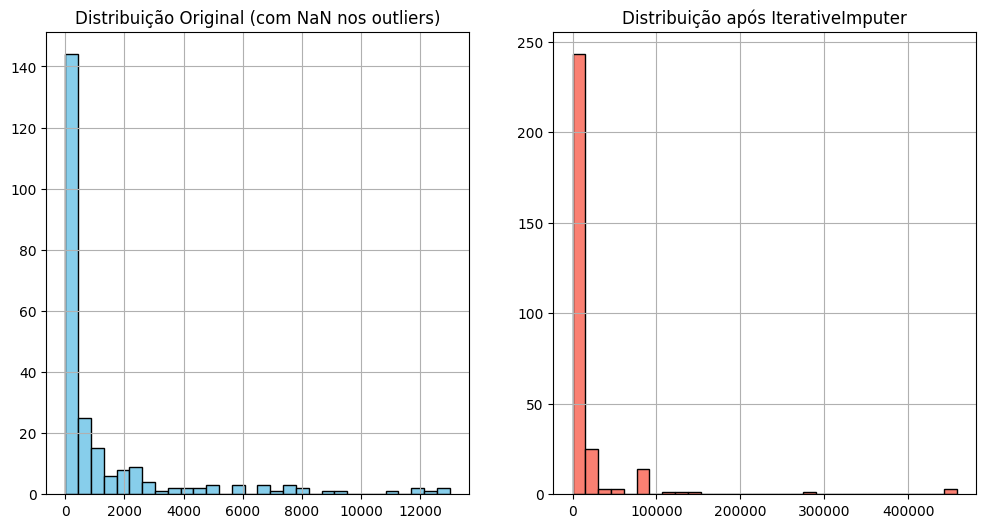

In [27]:
import matplotlib.pyplot as plt

#### Coluna original (com NaN nos outliers)
col_original = df_water_quality["Total_Coliform_MPN_per_100_ml"]

#### Coluna imputada
col_imputed = df_water_quality_imputed["Total_Coliform_MPN_per_100_ml"]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
col_original.hist(bins=30, color="skyblue", edgecolor="black")
plt.title("Distribuição Original (com NaN nos outliers)")

plt.subplot(1,2,2)
col_imputed.hist(bins=30, color="salmon", edgecolor="black")
plt.title("Distribuição após IterativeImputer")

plt.show()


- O IterativeImputer gerou uma matriz numpy (df_imputed) com os valores imputados.


In [28]:
### Comapração Lado a lado

comparacao = pd.DataFrame({
    "Original": df_water_quality["Total_Coliform_MPN_per_100_ml"], #NaN nos outliers
    "Imputada": df_water_quality_imputed["Total_Coliform_MPN_per_100_ml"]
})


### Mostrando apenas as linhas que eram outliers (agora NaN no original)

comparacao_outliers = comparacao[comparacao["Original"].isna()]
print(comparacao_outliers.head(10))

     Original  Imputada
134       NaN   45500.0
135       NaN   30500.0
138       NaN   16700.0
139       NaN   19000.0
140       NaN   17700.0
141       NaN   14500.0
143       NaN   17500.0
146       NaN   30000.0
149       NaN   26000.0
150       NaN   81150.0


#### > **7**Como concatenar vários DataFrames (empilhando linhas ou colunas), mesmo que tenham colunas diferentes?
Dica: Utiliza-se pd.concat() especificando axis=0 (linhas) ou axis=1 (colunas). Quando há colunas diferentes, os valores ausentes são preenchidos com NaN

#### > 8. Utilizando pandas, como realizar a leitura de um arquivo CSV em um DataFrame e exibir as primeiras linhas?

In [29]:
### Conforme utilizado o exemplo do dataset via kaggle, é utilizado para leitura do dataset:

#df_water_quality = pd.read_csv(r"D:\HD 1TB\Documentos\Cursos Online\Bootcamp_Avanti_ML\projeto_atividade_01_bootcamp_machine_Learning_avantii_atlantico\atividade_01\atividade_02\data\Results_MADE.csv", sep=",", encoding='latin-1')

### Exibindo as primeiras linhas do dataset:

#df_water_quality.head(5)





#### > 9.Utilizando pandas, como selecionar uma coluna específica e filtrar linhas em um “DataFrame” com base em uma condição?

In [30]:
df_water_quality_imputed.head(5)

,Temperature,Dissolved Oxygen,pH,Bio_Chemical_Oxygen_Demand_mg_L,Feacal_Steptococci_MPN_100_per_ml,Nitrate_mg_per_L,Faecal_Coliform_MPN_per_100_ml,Total_Coliform_MPN_per_100_ml,Conductivity_mho_per_Cm,WQI
0,7.5,9.95,7.85,0.15,90.0,0.255,22.5,180.0,134.5,27.143963
1,11.0,9.65,7.70,0.45,205.0,0.200,62.5,410.0,77.0,15.780001
2,7.5,9.90,7.65,0.55,100.0,0.100,26.0,200.0,101.5,20.612438
3,8.5,9.65,7.55,0.35,300.0,0.250,97.5,600.0,148.0,29.820475
4,10.0,9.55,7.80,0.25,190.0,0.150,47.5,380.0,106.0,21.498569


#### > Dado as recomendações da portaria:O valor de pH ideal para água potável para consumo humano, segundo o Ministério da Saúde (Portaria GM/MS nº 888/2021) e normas da OMS, situa-se na faixa entre 6,0 e 9,5
#### Filtrando a coluna de  pH para o valo recomendado

In [31]:
df_water_quality.shape

(295, 10)

In [32]:
pH_recomendado = df_water_quality[
    (df_water_quality["pH"] >= 6.0) & (df_water_quality["pH"] <= 9.5)
    ]
pH_recomendado

,Temperature,Dissolved Oxygen,pH,Bio_Chemical_Oxygen_Demand_mg_L,Feacal_Steptococci_MPN_100_per_ml,Nitrate_mg_per_L,Faecal_Coliform_MPN_per_100_ml,Total_Coliform_MPN_per_100_ml,Conductivity_mho_per_Cm,WQI
0,7.5,9.95,7.85,0.15,90.00,0.255,22.5,180.0,134.5,27.143963
1,11.0,9.65,7.70,0.45,205.00,0.200,62.5,410.0,77.0,15.780001
2,7.5,9.90,7.65,0.55,100.00,0.100,26.0,200.0,101.5,20.612438
3,8.5,9.65,7.55,0.35,300.00,0.250,97.5,600.0,148.0,29.820475
4,10.0,9.55,7.80,0.25,190.00,0.150,47.5,380.0,106.0,21.498569
...,...,...,...,...,...,...,...,...,...,...
290,28.0,6.95,7.85,0.37,28.00,0.115,25.0,56.0,281.5,56.181191
291,28.0,6.90,7.95,0.60,27.75,0.150,23.0,55.5,274.0,54.711315
292,25.0,7.40,7.70,0.55,60.75,0.500,15.0,121.5,286.0,57.114775
293,28.0,6.75,7.90,0.70,35.00,0.000,27.0,70.0,1572.5,311.545107


#### > **10.** Utilizando pandas, como lidar com valores ausentes (NaN) em um DataFrame?

#### Como não tenho dados ausentes nessa coluna, seria interessante invocar dados NaN em alguma coluna do dataset para se utilizar algum método/ação de dados ausentes: Estatísticas Descritivas


#### Nesse sentido, para que se possa utilizar algum método de imputalção, dentre eles:

- Deleção de Linhas (em última instância, pois quando se está trabalhando com dados, a última solução a ser feita é excluir a linha ou coluna, para que possa não inserir viés de informação na própria informação que se está trabalhando (dados).
-  Deleção de Colunas: Evitam a necessidade de análise complexa e da mesma forma que ocorre na deleção de linhas (objetos) pode-se perder informação importante.
#### Desse modo, é necessário trabalhar com a abordagem, sem modificar a distribuição dos dados, sem inserir viés.

- Imputação por medidas de tendência central: Os valores ausentes são substituídos pela média, moda ou mediana dos valores conhecidos para aquela variável No entanto, mesmo sendo uma abordagem simples e rápida, mas pode introduzir viés nos dados, especialmente se houver um número significativo de valores ausentes.
- Imputação por Hot-Deck -->  Nessa técnica os valores ausentes são substituídos por valores de observações semelhantes no conjunto de dados. Essa abordagem requer a identificação de observações semelhantes com base em características compartilhadas.
- Imputação por Modelos (Classificação ou Regressão) --> Valores ausentes são estimados com base em um modelo construído usando as demais variáveis do conjunto de dados. Os modelos permitem uma imputação mais precisa, levando em consideração as relações entre as variáveis. No entanto, essa abordagem pode inserir ruídos nos dados, bem como valores não permitidos, de acordo com o modelo escolhido.
- Impurtação Iterativa Imputer--> Faz a imputação iterativa: cada variável é prevista em rodízio usando as demais. Muito flexível, pode usar regressão, random forestm e Bayesin Ridge.

#### > Portanto, irei simular 20% de dados missing na coluna `Temperature` do Dataset

In [33]:
df_water_quality_imputed.isna().sum() / df_water_quality_imputed.shape[0] * 100

Temperature                          0.0
Dissolved Oxygen                     0.0
pH                                   0.0
Bio_Chemical_Oxygen_Demand_mg_L      0.0
Feacal_Steptococci_MPN_100_per_ml    0.0
Nitrate_mg_per_L                     0.0
Faecal_Coliform_MPN_per_100_ml       0.0
Total_Coliform_MPN_per_100_ml        0.0
Conductivity_mho_per_Cm              0.0
WQI                                  0.0
dtype: float64

#### >  Definir proporção de valores a remover:

In [34]:
proporcao = 0.2

### Núemro de linhas  serem removidas:
n_remover = int(len(df_water_quality_imputed) * proporcao)

### Selecionado aleatoriamente as linhas a serem removidas: Por índices:

indices_remover  = np.random.choice(df_water_quality_imputed.index, size=n_remover, replace=False) ### Função  np.randam choice seleciona aleatoriamente 20% dis índices do df

### Substituir por NaN apenas na coluna `Temperature``:

df_water_quality_imputed.loc[indices_remover, "Temperature" ] = np.nan

In [35]:
### Conferindo quantos valores ausentes restaram:

print(df_water_quality_imputed.isna().sum())

Temperature                          59
Dissolved Oxygen                      0
pH                                    0
Bio_Chemical_Oxygen_Demand_mg_L       0
Feacal_Steptococci_MPN_100_per_ml     0
Nitrate_mg_per_L                      0
Faecal_Coliform_MPN_per_100_ml        0
Total_Coliform_MPN_per_100_ml         0
Conductivity_mho_per_Cm               0
WQI                                   0
dtype: int64


### Verificando a distribuição para o dataframe

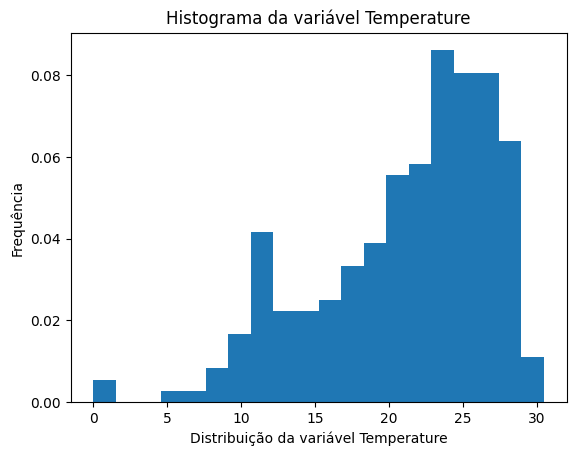

In [36]:
plt.hist(df_water_quality_imputed["Temperature"], bins=20, density=True)
plt.xlabel('Distribuição da variável Temperature')
plt.ylabel('Frequência')
plt.title("Histograma da variável Temperature")
plt.show()

#### Plotando um boxplot para essa variável:


In [37]:
box_plot_temperatura = px.box(df_water_quality_imputed, y="Temperature")
box_plot_temperatura.show()

### Usando o KnnImputer para imputar os valores ausentes na coluna `Temperature`

In [38]:
from sklearn.impute import KNNImputer


In [39]:
### Criando um cópía do dataframe para aplicar o KNNImputer:

df_temp = df_water_quality_imputed.copy()

### Como o KNNimputer recebe dataframes, não series esse passo não é necessário, apenas para especificar que a coluna a ser imputada é a de Temperature:

temperature = df_water_quality_imputed[["Temperature"]]

### Aplicando:

imputer = KNNImputer(n_neighbors=5)
temperature_imputed = imputer.fit_transform(temperature)

### Reconstruindo o dataframe:

df_temp["Temperature_imputed"] = temperature_imputed


In [40]:
### Comparando as distribuições:

comparacao = df_temp[["Temperature", "Temperature_imputed"]]
print(comparacao.head(10))

   Temperature  Temperature_imputed
0          7.5             7.500000
1         11.0            11.000000
2          NaN            21.046822
3          8.5             8.500000
4         10.0            10.000000
5         11.0            11.000000
6          NaN            21.046822
7         10.5            10.500000
8         14.5            14.500000
9         16.5            16.500000
